<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Project_Heart_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q ads

     |████████████████████████████████| 41 kB 533 kB/s 


In [3]:
import ads
ads.__version__

'0.12.3'

In [100]:
# import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset = pd.read_csv('https://raw.githubusercontent.com/MpRonald/datasets/main/doenca_cardiaca_final.csv')
dataset.head(6)

,sexo,idade,cigarros_por_dia,uso_medicamento_pressao,AVC,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,IMC,freq_cardiaca,glicemia,fumante,risco_DAC_decada
0,1,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0
2,1,48,20,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,2,0
3,0,61,30,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,3,1
4,0,46,23,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,3,0
5,0,43,0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sexo                         6954 non-null   int64  
 1   idade                        6954 non-null   int64  
 2   cigarros_por_dia             6954 non-null   int64  
 3   uso_medicamento_pressao      6954 non-null   float64
 4   AVC                          6954 non-null   int64  
 5   hipertensao                  6954 non-null   int64  
 6   diabetes                     6954 non-null   int64  
 7   colesterol_total             6954 non-null   float64
 8   pressao_arterial_sistolica   6954 non-null   float64
 9   pressao_arterial_diastolica  6954 non-null   float64
 10  IMC                          6954 non-null   float64
 11  freq_cardiaca                6954 non-null   float64
 12  glicemia                     6954 non-null   float64
 13  fumante           

In [8]:
X = dataset.iloc[:,0:14]
X.shape

(6954, 14)

In [9]:
y = dataset.iloc[:,14]
y.shape

(6954,)

In [10]:
np.random.seed(42)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [12]:
X_train.shape, y_train.shape

((5910, 14), (5910,))

In [13]:
X_test.shape, y_test.shape

((1044, 14), (1044,))

In [14]:
tree = DecisionTreeClassifier(max_depth=120).fit(X_train, y_train)

In [15]:
tree.score(X_test, y_test)

0.9090038314176245

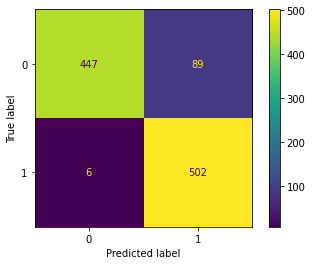

In [16]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test);

In [17]:
y_pred = tree.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.9090038314176245

In [19]:
cross_validate(tree, X, y)

{'fit_time': array([0.03414607, 0.04297137, 0.03277755, 0.0326345 , 0.03183079]),
 'score_time': array([0.00302172, 0.0029614 , 0.0029099 , 0.00297689, 0.00296068]),
 'test_score': array([0.91301222, 0.91876348, 0.90007189, 0.91660676, 0.91007194])}

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       536
           1       0.85      0.99      0.91       508

    accuracy                           0.91      1044
   macro avg       0.92      0.91      0.91      1044
weighted avg       0.92      0.91      0.91      1044



In [21]:
tree.feature_importances_

array([0.01939473, 0.17644557, 0.05994374, 0.00350179, 0.00381464,
       0.01348196, 0.0012331 , 0.12841557, 0.13526209, 0.11859615,
       0.12564023, 0.07897355, 0.12873376, 0.00656314])

In [22]:
pd.Series(data=tree.feature_importances_, index=X_test.columns).sort_values(ascending=False)

idade                          0.176446
pressao_arterial_sistolica     0.135262
glicemia                       0.128734
colesterol_total               0.128416
IMC                            0.125640
pressao_arterial_diastolica    0.118596
freq_cardiaca                  0.078974
cigarros_por_dia               0.059944
sexo                           0.019395
hipertensao                    0.013482
fumante                        0.006563
AVC                            0.003815
uso_medicamento_pressao        0.003502
diabetes                       0.001233
dtype: float64

In [23]:
data = dataset.drop(['diabetes', 'uso_medicamento_pressao', 'AVC'], axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sexo                         6954 non-null   int64  
 1   idade                        6954 non-null   int64  
 2   cigarros_por_dia             6954 non-null   int64  
 3   hipertensao                  6954 non-null   int64  
 4   colesterol_total             6954 non-null   float64
 5   pressao_arterial_sistolica   6954 non-null   float64
 6   pressao_arterial_diastolica  6954 non-null   float64
 7   IMC                          6954 non-null   float64
 8   freq_cardiaca                6954 non-null   float64
 9   glicemia                     6954 non-null   float64
 10  fumante                      6954 non-null   int64  
 11  risco_DAC_decada             6954 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 652.1 KB


In [25]:
X = data.iloc[:,0:11]
X.shape

(6954, 11)

In [26]:
y = data.iloc[:,11]
y.shape

(6954,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [28]:
X_train.shape, y_train.shape

((5910, 11), (5910,))

In [29]:
X_test.shape, y_test.shape

((1044, 11), (1044,))

In [30]:
tree = DecisionTreeClassifier(max_depth=120).fit(X_train, y_train)

In [31]:
tree.score(X_test, y_test)

0.9109195402298851

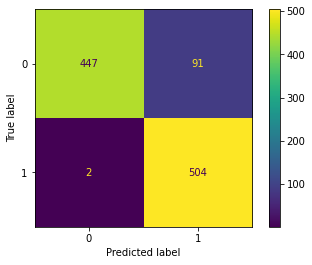

In [32]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test);

In [33]:
y_pred = tree.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.9109195402298851

In [35]:
cross_validate(tree, X, y)

{'fit_time': array([0.03590822, 0.03602481, 0.03542566, 0.0315814 , 0.02996302]),
 'score_time': array([0.00258017, 0.00364757, 0.00258803, 0.00251341, 0.00238276]),
 'test_score': array([0.91516894, 0.91732566, 0.90941769, 0.91516894, 0.91151079])}

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       538
           1       0.85      1.00      0.92       506

    accuracy                           0.91      1044
   macro avg       0.92      0.91      0.91      1044
weighted avg       0.92      0.91      0.91      1044



# Using Grid Search

In [37]:
# function to run Grid Search
def run_grid_search(estimators, param, X, y):
  grid = GridSearchCV(estimator=estimators, param_grid=param).fit(X, y)
  print(f"Best Parameter: {grid.best_params_}")
  print(f"Best Index: {grid.best_index_}")
  best_score = round(grid.best_score_,4)
  print(f"Best Score: {best_score}")

# Parameters to Random Forest Classifier

In [38]:
parameters_R = {
      'criterion':['gini', 'entropy'],
      'n_estimators':[10, 50, 100, 200],
      'min_samples_split':[2,5,10],
      'min_samples_leaf':[2,6,10]}

result_RF = GridSearchCV(RandomForestClassifier(), param_grid = parameters_R).fit(X_train, y_train)
best_RF = result_RF.best_score_
best_RF

0.940439932318105

In [39]:
y_pred = result_RF.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred)
accuracy_random_forest

0.9588122605363985

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       538
           1       0.94      0.98      0.96       506

    accuracy                           0.96      1044
   macro avg       0.96      0.96      0.96      1044
weighted avg       0.96      0.96      0.96      1044



In [67]:
data_random_forest = pd.DataFrame(result_RF.cv_results_)
data_random_forest.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.157138,0.023291,0.011674,0.003688,gini,2,2,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.929780,0.906091,0.916244,0.924704,0.930626,0.921489,0.009243,18
1,0.723741,0.109207,0.032385,0.006614,gini,2,2,50,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.936548,0.930626,0.934010,0.927242,0.934856,0.932657,0.003324,12
2,1.462281,0.253566,0.073414,0.021979,gini,2,2,100,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.951777,0.932318,0.941624,0.934856,0.937394,0.939594,0.006823,4
3,1.516651,0.270282,0.073629,0.001963,gini,2,2,200,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.937394,0.943316,0.947547,0.928934,0.943316,0.940102,0.006452,3
4,0.072245,0.002721,0.006451,0.000627,gini,2,5,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.917090,0.912860,0.920474,0.915398,0.917090,0.916582,0.002487,21
5,0.338765,0.004823,0.021403,0.002942,gini,2,5,50,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.941624,0.939086,0.937394,0.929780,0.938240,0.937225,0.003983,7
6,0.680283,0.007613,0.037998,0.002697,gini,2,5,100,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.939932,0.944162,0.934856,0.928088,0.939086,0.937225,0.005441,7
7,1.365085,0.006524,0.073888,0.003260,gini,2,5,200,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.939086,0.940778,0.944162,0.931472,0.940778,0.939255,0.004227,5
8,0.070540,0.001609,0.006677,0.001556,gini,2,10,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.891709,0.893401,0.901861,0.888325,0.897631,0.894585,0.004713,23
9,0.337047,0.009330,0.019396,0.000755,gini,2,10,50,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.912860,0.913706,0.920474,0.906937,0.921320,0.915059,0.005313,22


In [69]:
result_RF.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

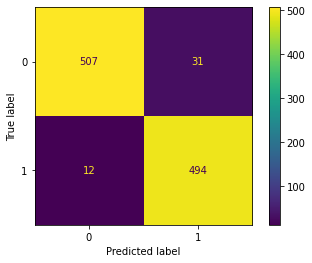

In [42]:
ConfusionMatrixDisplay.from_estimator(result_RF, X_test, y_test);

# Logistic Regression

In [ ]:
parameters_L ={
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001],
    'C': [1.0, 1.5, 2.0, 2.5, 3.0],
    'solver': ['lbfgs', 'sag', 'saga']}

result_lr = GridSearchCV(LogisticRegression(), param_grid = parameters_L).fit(X_train, y_train)

In [44]:
best_lr = result_lr.best_score_
best_lr

0.6554991539763113

In [45]:
data_lr = pd.DataFrame(result_lr.cv_results_)
data_lr.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.133562,0.009818,0.002914,0.000030,1.0,lbfgs,0.1,"{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.1}",0.648054,0.658206,0.677665,0.638748,0.643824,0.653299,0.013761,6
1,0.130932,0.019048,0.003370,0.000893,1.0,lbfgs,0.01,"{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.01}",0.648054,0.658206,0.677665,0.638748,0.643824,0.653299,0.013761,6
2,0.126530,0.003427,0.003284,0.000441,1.0,lbfgs,0.001,"{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.001}",0.648054,0.658206,0.677665,0.638748,0.643824,0.653299,0.013761,6
3,0.127664,0.013770,0.002930,0.000106,1.0,lbfgs,0.0001,"{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}",0.648054,0.658206,0.677665,0.638748,0.643824,0.653299,0.013761,6
4,0.130792,0.007979,0.002886,0.000093,1.0,lbfgs,0.00001,"{'C': 1.0, 'solver': 'lbfgs', 'tol': 1e-05}",0.648054,0.658206,0.677665,0.638748,0.643824,0.653299,0.013761,6


In [46]:
y_pred = result_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_lr

0.671455938697318

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       538
           1       0.66      0.68      0.67       506

    accuracy                           0.67      1044
   macro avg       0.67      0.67      0.67      1044
weighted avg       0.67      0.67      0.67      1044



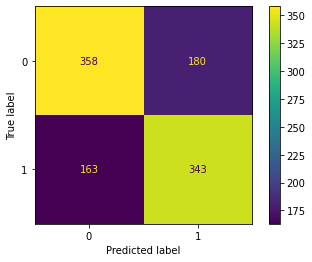

In [48]:
ConfusionMatrixDisplay.from_estimator(result_lr, X_test, y_test);

# KNN

In [49]:
parameters_K = {
    'n_neighbors':[3, 5, 10, 20, 35],
    'p':[1,2]}
result_knn = GridSearchCV(KNeighborsClassifier(), param_grid = parameters_K).fit(X, y)
best_knn = result_knn.best_score_
data_knn = pd.DataFrame(result_knn.cv_results_)

In [50]:
data_knn = pd.DataFrame(result_knn.cv_results_)
data_knn.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010792,0.001230,0.072796,0.003046,3,1,"{'n_neighbors': 3, 'p': 1}",0.854062,0.861970,0.861970,0.870597,0.846763,0.859072,0.008078,1
1,0.009805,0.000064,0.054414,0.002552,3,2,"{'n_neighbors': 3, 'p': 2}",0.848311,0.865564,0.860532,0.861970,0.856115,0.858498,0.005926,2
2,0.010154,0.000821,0.086114,0.004506,5,1,"{'n_neighbors': 5, 'p': 1}",0.799425,0.791517,0.800863,0.808771,0.792806,0.798676,0.006212,3
3,0.009974,0.000261,0.063165,0.005338,5,2,"{'n_neighbors': 5, 'p': 2}",0.792236,0.798706,0.798706,0.800863,0.802158,0.798534,0.003414,4
4,0.009654,0.000050,0.104080,0.004026,10,1,"{'n_neighbors': 10, 'p': 1}",0.720345,0.698778,0.723221,0.725377,0.728777,0.719300,0.010624,6


In [51]:
y_pred = result_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_knn

0.9386973180076629

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       538
           1       0.89      0.99      0.94       506

    accuracy                           0.94      1044
   macro avg       0.94      0.94      0.94      1044
weighted avg       0.94      0.94      0.94      1044



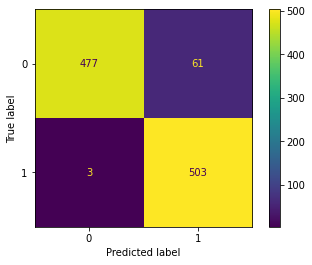

In [53]:
ConfusionMatrixDisplay.from_estimator(result_knn, X_test, y_test);

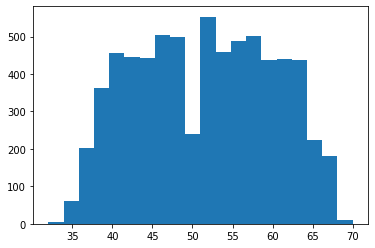

In [57]:
plt.hist(x=data.idade, bins=20);

# Using the best parameters

In [70]:
random_forest_parameters = result_RF.best_params_

In [74]:
best_model = RandomForestClassifier(**random_forest_parameters).fit(X_train, y_train)

In [75]:
clf = DecisionTreeClassifier(max_depth=120).fit(X_train, y_train)

In [77]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

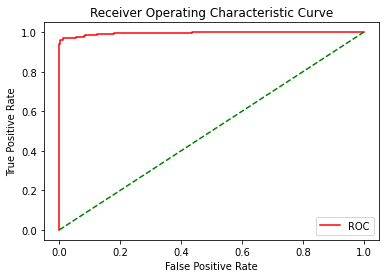

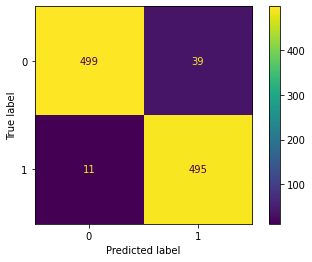

In [81]:
y_pred = best_model.predict_proba(X_test)
y_pred = y_pred[:, 1]
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)
print('\n')
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test);

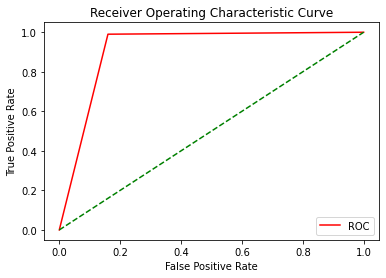

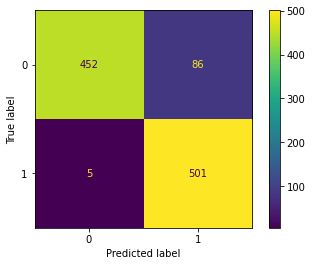

In [82]:
y_pred = clf.predict_proba(X_test)
y_pred = y_pred[:, 1]
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)
print('\n')
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

In [93]:
y_pred = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred)
accuracy_best

0.9521072796934866

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       538
           1       0.93      0.98      0.95       506

    accuracy                           0.95      1044
   macro avg       0.95      0.95      0.95      1044
weighted avg       0.95      0.95      0.95      1044



In [95]:
y_pred = clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred)
print(accuracy_best)
print(classification_report(y_test, y_pred))

0.9128352490421456
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       538
           1       0.85      0.99      0.92       506

    accuracy                           0.91      1044
   macro avg       0.92      0.92      0.91      1044
weighted avg       0.92      0.91      0.91      1044



In [97]:
features = pd.Series(data=best_model.feature_importances_, index=X_test.columns).sort_values(ascending=False)

In [98]:
features

idade                          0.150635
pressao_arterial_sistolica     0.146609
IMC                            0.130600
colesterol_total               0.123843
glicemia                       0.120526
pressao_arterial_diastolica    0.116159
freq_cardiaca                  0.101612
cigarros_por_dia               0.046690
fumante                        0.022173
sexo                           0.021617
hipertensao                    0.019537
dtype: float64

In [129]:
data_features = pd.DataFrame(features, columns = ['importance'])

In [152]:
data_features

,importance
idade,0.150635
pressao_arterial_sistolica,0.146609
IMC,0.130600
colesterol_total,0.123843
glicemia,0.120526
pressao_arterial_diastolica,0.116159
freq_cardiaca,0.101612
cigarros_por_dia,0.046690
fumante,0.022173
sexo,0.021617


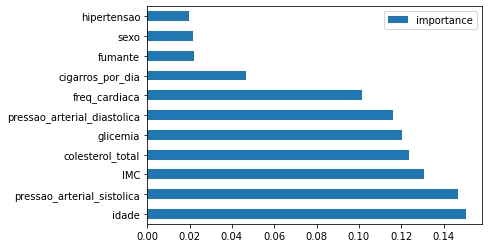

In [146]:
data_features.plot.barh();

In [157]:
fig = px.area(data_features)
fig.show()

In [163]:
fig = px.parallel_coordinates(data[['idade','IMC', 'colesterol_total']],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()